In [27]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from src.model_card_creator import ModelCardCreator

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


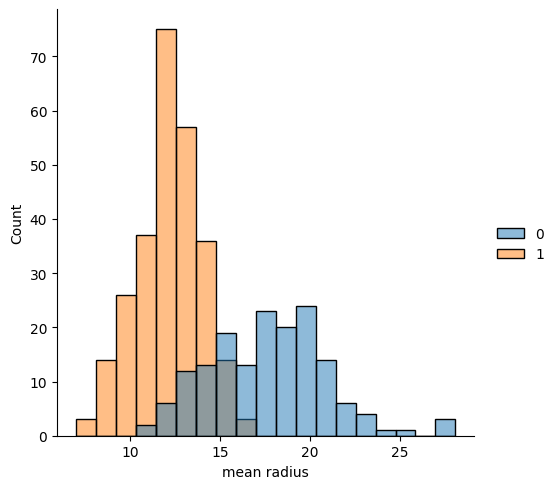

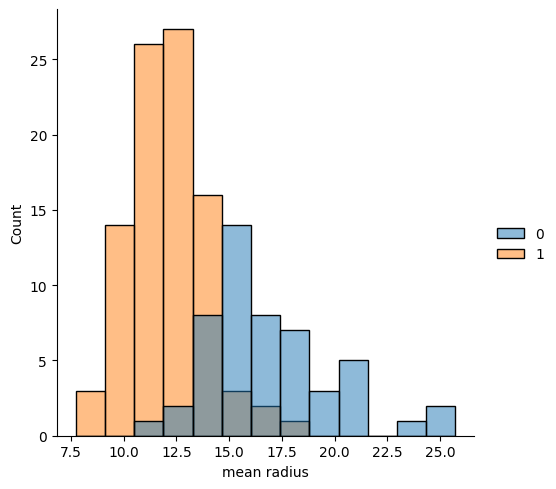

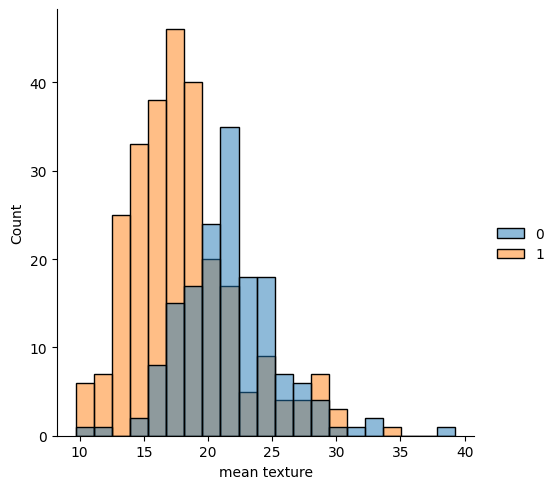

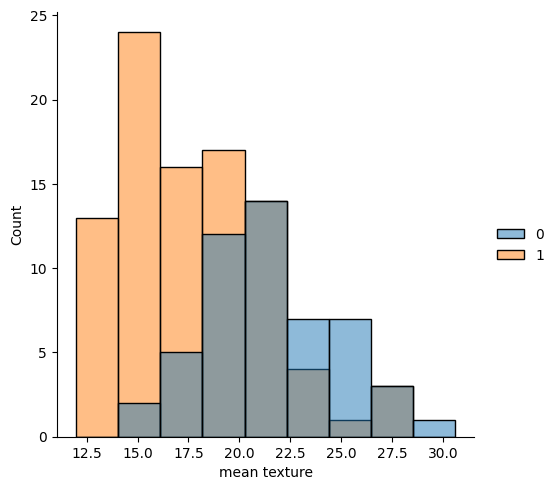

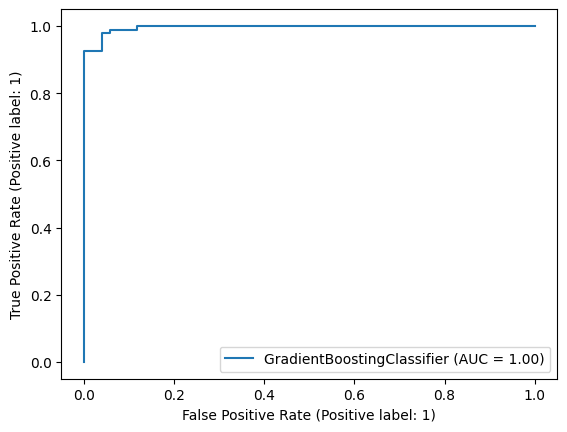

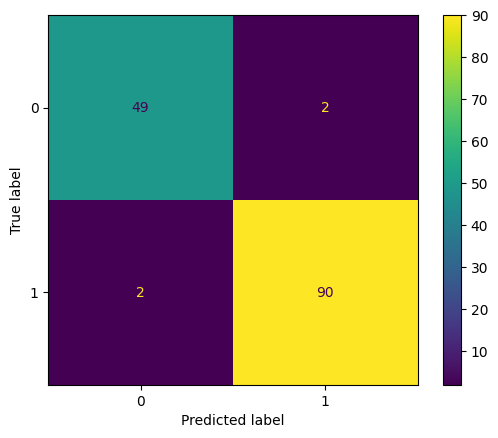

In [32]:
cancer = load_breast_cancer()

X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)
X_train, X_test, y_train, y_test = train_test_split(X, y)

mean_radius_train = sns.displot(x=X_train['mean radius'], hue=y_train)
mean_radius_test = sns.displot(x=X_test['mean radius'], hue=y_test)

mean_texture_train = sns.displot(x=X_train['mean texture'], hue=y_train)
mean_texture_test = sns.displot(x=X_test['mean texture'], hue=y_test)

clf = GradientBoostingClassifier().fit(X_train, y_train)

roc_image = plot_roc_curve(clf, X_test, y_test)
confusion_matrix_image = plot_confusion_matrix(clf, X_test, y_test)

In [61]:
output_path = Path.cwd()
model_name = 'cancer_example'
overview = 'This model was used just to test out the library I built.'
owner_name = 'you'
owner_contact_mail = 'you@you.com'

model_card_creator = ModelCardCreator(output_path, model_name, overview, owner_name, owner_contact_mail)

data_analysis_train_images = [
    mean_radius_train,
    mean_texture_train,
]

model_card_creator.add_dataset_descriptions("Images of the train set", data_analysis_train_images)

data_analysis_test_images = [
    mean_radius_test,
    mean_texture_test
]

model_card_creator.add_dataset_descriptions("Images of the test set", data_analysis_test_images)

model_card_creator.add_user("mr. you")
model_card_creator.add_user("mr. not you")

model_card_creator.add_usecase("to predict cancer")
model_card_creator.add_usecase("to find the causes of cancer")

model_card_creator.add_risk_and_mitigation("Someone might find this demo very poor.","do not share it!")
model_card_creator.add_limitation("This model should not be used anywhere, for anything...it is just a test")

results_images = [
    roc_image.figure_,
    confusion_matrix_image.figure_
]

model_card_creator.add_metric_descriptions( "Here are the great results", results_images)

model_card_creator.add_performance_metrics('accuracy', str(0.99))
model_card_creator.add_performance_metrics('F1', str(0.99))

card_html = model_card_creator.compile_model_card()

type(mean_texture_test)

seaborn.axisgrid.FacetGrid